<a href="https://colab.research.google.com/github/jeet1912/ms/blob/main/cs670/Assignments/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be graded  on a 0-4 scale, following the standard NJIT convention (A:4, B+: 3.5, B:3, C+: 2.5, C: 2, D:1, F:0).
The total score must be re-scaled to 100 &mdash; that should apply to all future assignments so that Canvas assigns the same weight on all assignments.


----

<i>General instructions for this and future notebooks:</i>
1. To run a cell and move to the next cell: Hold down <strong>Shift</strong> and press <strong>Enter</strong>.
2. To run a cell and stay in the same cell: Hold down <b>Ctrl</b> and press <b>Enter</b>.
3. Use the arrow up and down to navigate or do it manually as you prefer.
4. Escape from typing a cell: Hit <b>Esc</b>.

---------

<b>Note: </b>

> You must run/evaluate all cells. <b>Order of cell execution is important.</b>



> You must work directly out of a copy of the assignment notebook given to you, in the exact order.


In [595]:
# Grader's area

import numpy as np

# This assignment contains 2 exercises each with at most 2 parts.
# We initialize a 2x2 array M, containing zeros.
# The grade for question i, part j, will be recorded in M[i,j].
# Then the total grade can be easily computed in the last grader's area.

M = np.zeros((4,3))
max_score_M = np.zeros((4,3))

# **Assignment 3**
The third assignment helps you become familiar with using Python's machine learning related code to make predictions. The goal of this assignment is to predict the weather type based on the conditions of the day.

### **Part 1: Data pre-processing**

This is a fundamental phase in machine learning. Real-world data can sometimes be uneven. If the data is directly fed to the machine learning model, the excessive amount of noise may not lead to good predictions. This section aims to enhance the model's ability to predict outcomes more effectively. It involves the process of detecting, correcting, or removing corrupt, inaccurate, or irrelevant records from a dataset.



**Step 1**: Download the weather dataset to the local Colab environment. Then, read the dataset into a dataframe format using <code>pandas</code> package.

In [596]:
!git clone https://github.com/XYZNJIT/weather_prediction_dataset.git

fatal: destination path 'weather_prediction_dataset' already exists and is not an empty directory.


In [597]:
import pandas as pd

dataset = pd.read_csv('/content/weather_prediction_dataset/seattle-weather.csv')

**Step 2**: We use methods such as <code>info</code> in pandas to help us get a preliminary overview of the dataset.



Based on the information provided below, we understand that the dataset comprises six columns: date, precipitation, maximum temperature, minimum temperature, wind speed, and weather type. From the data types, we can discern which columns contain numeric data and which contain non-numeric data.



In [598]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1466 non-null   object 
 1   precipitation  1466 non-null   float64
 2   temp_max       1464 non-null   float64
 3   temp_min       1463 non-null   float64
 4   wind           1466 non-null   float64
 5   weather        1466 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.8+ KB
None


The method <code>shape</code> will inform you of the size of this dataset.

In [599]:
print(dataset.shape)

(1466, 6)


In [600]:
dataset

,date,precipitation,temp_max,temp_min,wind,weather
0,2012/1/1,0.0,12.8,5.0,4.7,drizzle
1,2012/1/2,10.9,10.6,2.8,4.5,rain
2,2012/1/3,0.8,11.7,7.2,2.3,rain
3,2012/1/4,20.3,12.2,5.6,4.7,rain
4,2012/1/5,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1461,2015/12/27,8.6,4.4,1.7,2.9,rain
1462,2015/12/28,1.5,5.0,1.7,1.3,rain
1463,2015/12/29,0.0,7.2,0.6,2.6,fog
1464,2015/12/30,0.0,5.6,-1.0,3.4,sun


<ipython-input-601-c392412eded1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(dataset, x='precipitation', y='weather', inner='box', palette='Dark2')


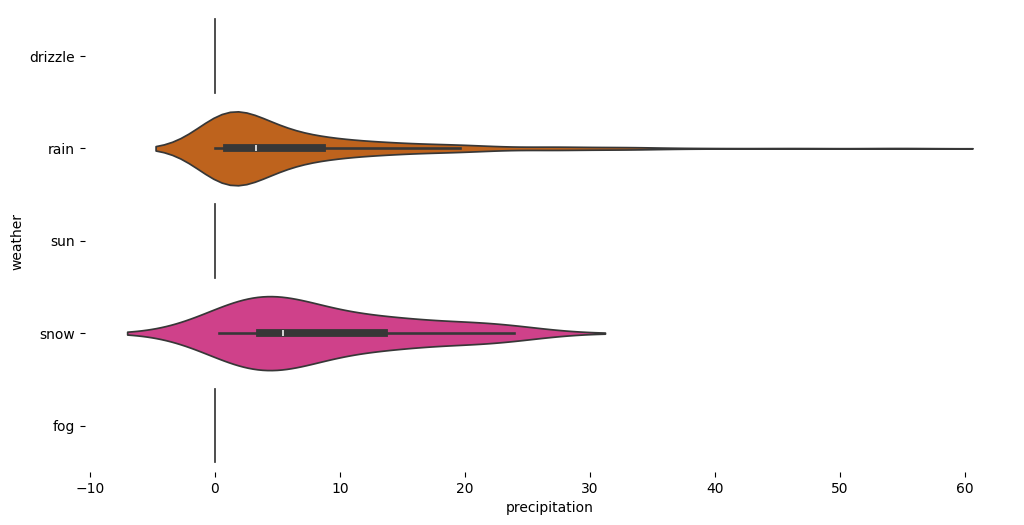

In [601]:
# @title weather vs precipitation

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dataset['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dataset, x='precipitation', y='weather', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-602-1db72436b887>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(dataset, x='wind', y='weather', inner='box', palette='Dark2')


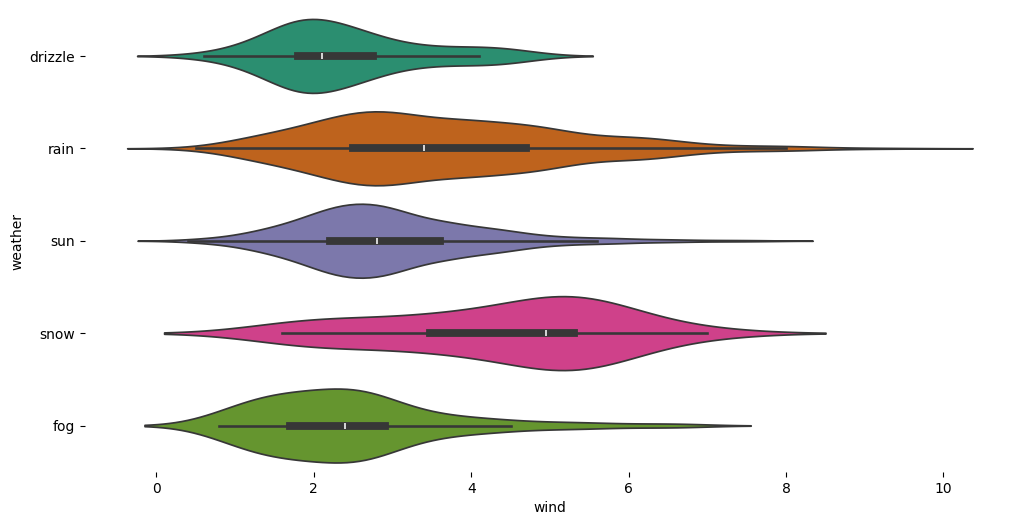

In [602]:
# @title weather vs wind

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dataset['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dataset, x='wind', y='weather', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

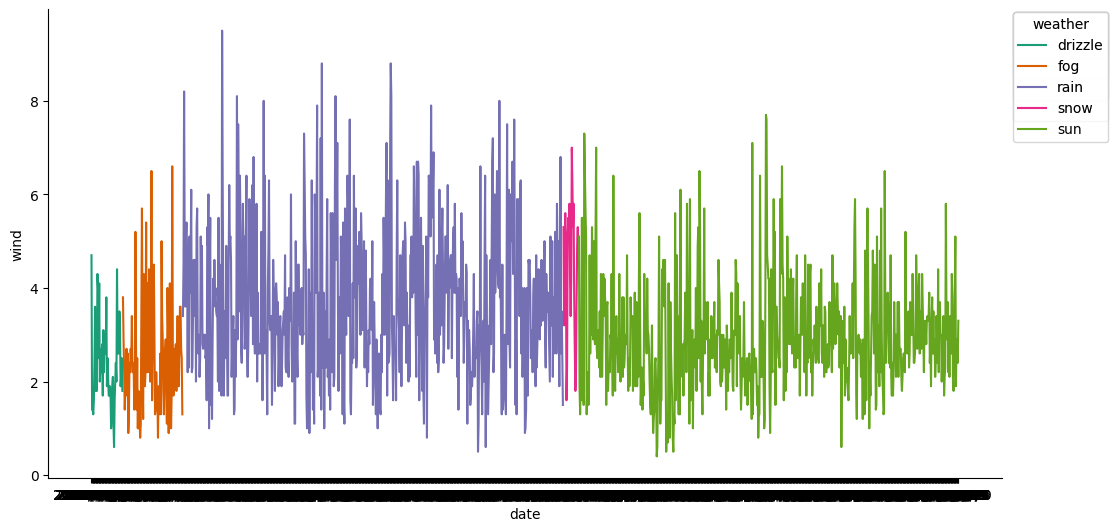

In [603]:
# @title date vs wind

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['wind']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('weather')):
  _plot_series(series, series_name, i)
  fig.legend(title='weather', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('wind')

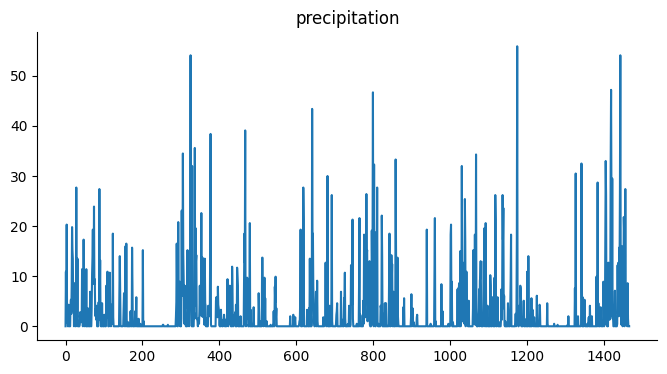

In [604]:
# @title precipitation

from matplotlib import pyplot as plt
dataset['precipitation'].plot(kind='line', figsize=(8, 4), title='precipitation')
plt.gca().spines[['top', 'right']].set_visible(False)

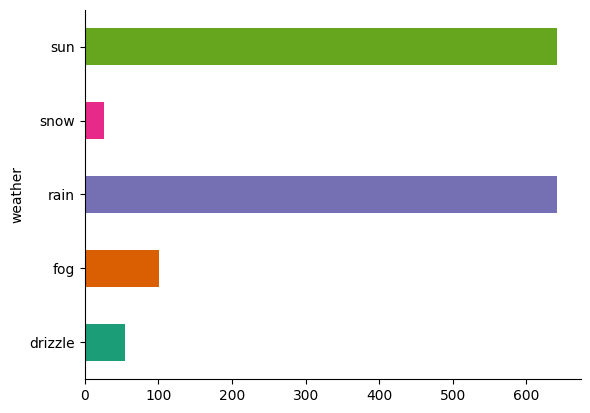

In [605]:
# @title weather

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('weather').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

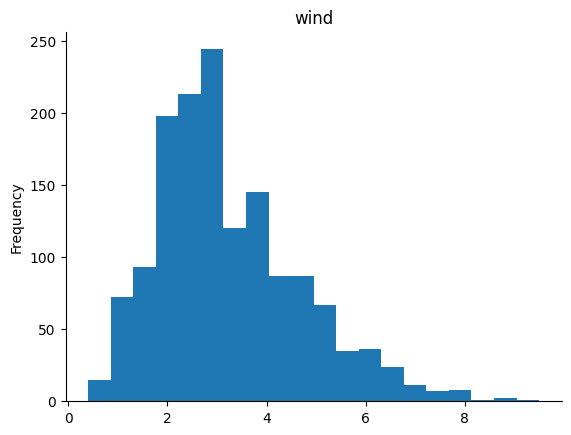

In [606]:
# @title wind

from matplotlib import pyplot as plt
dataset['wind'].plot(kind='hist', bins=20, title='wind')
plt.gca().spines[['top', 'right',]].set_visible(False)

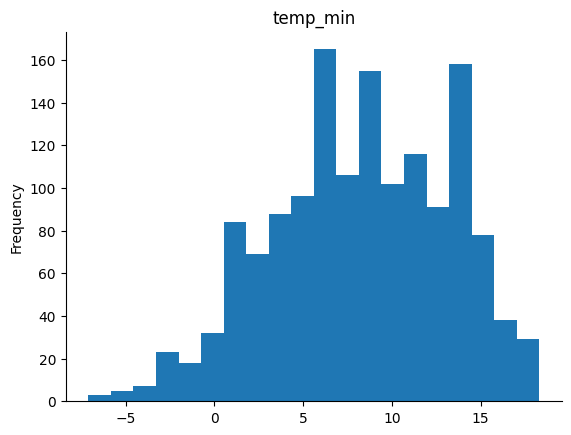

In [607]:
# @title temp_min

from matplotlib import pyplot as plt
dataset['temp_min'].plot(kind='hist', bins=20, title='temp_min')
plt.gca().spines[['top', 'right',]].set_visible(False)

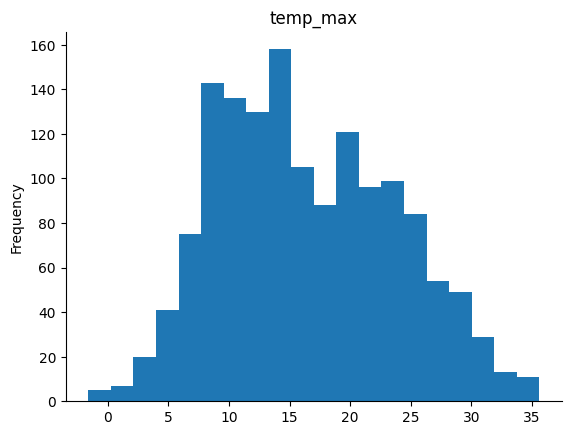

In [608]:
# @title temp_max

from matplotlib import pyplot as plt
dataset['temp_max'].plot(kind='hist', bins=20, title='temp_max')
plt.gca().spines[['top', 'right',]].set_visible(False)

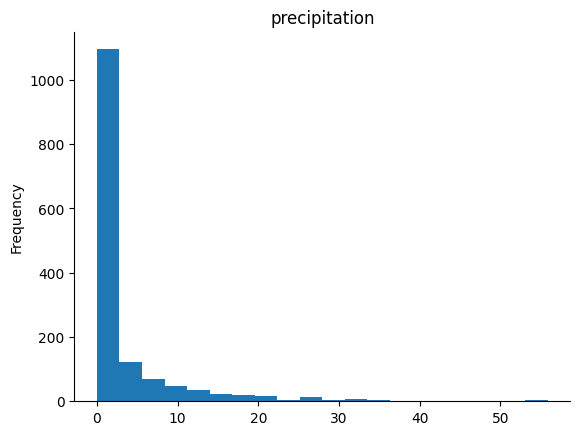

In [609]:
# @title precipitation

from matplotlib import pyplot as plt
dataset['precipitation'].plot(kind='hist', bins=20, title='precipitation')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Step 3**: Remove bad data, such as empty cells, duplicates, and data in the wrong format.

The method <code>dropna()</code> will delete rows that have missing values. The number of columns in shape changed from 1466 to 1461, indicating that there are five rows of data with missing data.

In [610]:
dataset = dataset.dropna()
print(dataset.shape)

(1461, 6)


#### <font color='#008DFF'>  **Question 1**

Use function <code>drop_duplicates()</code> to remove duplicates. <br><br>

<b>Expected Output:</b> <br><code>print(dataset.shape) <br>(1456, 6)</code>

In [611]:
# Your code here. Add more cells if needed
dataset = dataset.drop_duplicates()

In [612]:
print(dataset.shape)

(1456, 6)


In [613]:
# Grader's area


# M[1,1] =

max_score_M[1,1] = 2

####

<ipython-input-614-c3bc8dd8f96b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


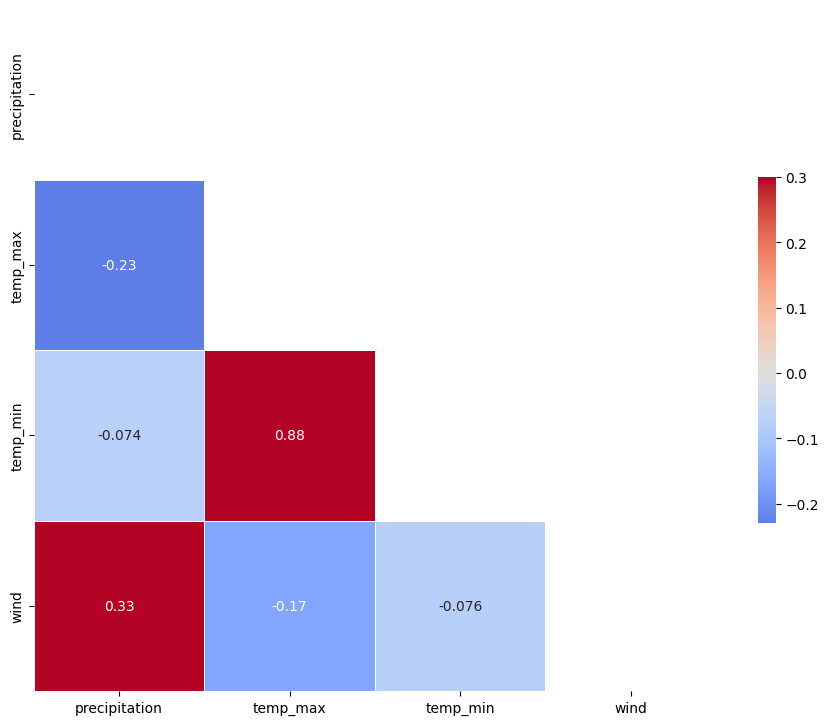

In [614]:
corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

**Step 4**: Convert data that cannot be directly used, such as string-type data, into numerical type.


In our current dataset, dates cannot be directly used as numeric data. However, the month may also be a contributing factor to the weather type. Therefore, we extract the month from the date and create a new column for it.

In [615]:
def getMonthInfo(row):
    month = row.split('/')[1]
    return month

dataset['month'] = dataset['date'].apply(lambda row : getMonthInfo(row)).astype(float)

By printing the dataset, you can see that a new column for the month has been added.

In [616]:
dataset

,date,precipitation,temp_max,temp_min,wind,weather,month
0,2012/1/1,0.0,12.8,5.0,4.7,drizzle,1.0
1,2012/1/2,10.9,10.6,2.8,4.5,rain,1.0
2,2012/1/3,0.8,11.7,7.2,2.3,rain,1.0
3,2012/1/4,20.3,12.2,5.6,4.7,rain,1.0
4,2012/1/5,1.3,8.9,2.8,6.1,rain,1.0
...,...,...,...,...,...,...,...
1461,2015/12/27,8.6,4.4,1.7,2.9,rain,12.0
1462,2015/12/28,1.5,5.0,1.7,1.3,rain,12.0
1463,2015/12/29,0.0,7.2,0.6,2.6,fog,12.0
1464,2015/12/30,0.0,5.6,-1.0,3.4,sun,12.0


#### <font color='#008DFF'>  **Question 2**

Please extract the day from the date as well, ensuring the day's range is in [1, 31]. <br><br>

<b>Expected Output:</b> <br><code>print(dataset.shape) <br>(1456, 8) <br>
print(len(dataset['day'].drop_duplicates()))<br>
31
</code>

In [617]:
# Your code here. Add more cells if needed
def getDateInfo(row):
  date = row.split('/')[2]
  return date

dataset['day'] = dataset['date'].apply(lambda row: getDateInfo(row)).astype(float)

In [618]:
print(dataset.shape)

(1456, 8)


In [619]:
print(len(dataset['day'].drop_duplicates()))

31


In [620]:
# Grader's area


# M[1,2] =

max_score_M[1,2] = 3

In fact, using numbers to represent months is not ideal because there should not be a numerical order between months. For instance, December and January are consecutive months, but numerically, they are far apart. Therefore, we introduce an algorithm called "One-hot encoding" to address this issue.
<br><br> One-hot encoding turns categories (like colors or types) into separate columns with 0s and 1s. If the original data value matches the column's category, that entry is marked with a 1; otherwise, it's marked with a 0. This method helps overcome the problem of machine learning models misinterpreting categorical data as having some sort of numerical relationship or order when there is none.


In [621]:
month_dummies = pd.get_dummies(dataset['month'])
dataset = pd.concat([dataset, month_dummies], axis=1)

dataset

,date,precipitation,temp_max,temp_min,wind,weather,month,day,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,2012/1/1,0.0,12.8,5.0,4.7,drizzle,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0
1,2012/1/2,10.9,10.6,2.8,4.5,rain,1.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0
2,2012/1/3,0.8,11.7,7.2,2.3,rain,1.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0
3,2012/1/4,20.3,12.2,5.6,4.7,rain,1.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0
4,2012/1/5,1.3,8.9,2.8,6.1,rain,1.0,5.0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,2015/12/27,8.6,4.4,1.7,2.9,rain,12.0,27.0,0,0,0,0,0,0,0,0,0,0,0,1
1462,2015/12/28,1.5,5.0,1.7,1.3,rain,12.0,28.0,0,0,0,0,0,0,0,0,0,0,0,1
1463,2015/12/29,0.0,7.2,0.6,2.6,fog,12.0,29.0,0,0,0,0,0,0,0,0,0,0,0,1
1464,2015/12/30,0.0,5.6,-1.0,3.4,sun,12.0,30.0,0,0,0,0,0,0,0,0,0,0,0,1


**Step 5**: Remove unnecessary columns.

In [622]:
dataset = dataset.drop(columns=['date', 'day'])
dataset

,precipitation,temp_max,temp_min,wind,weather,month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,0.0,12.8,5.0,4.7,drizzle,1.0,1,0,0,0,0,0,0,0,0,0,0,0
1,10.9,10.6,2.8,4.5,rain,1.0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.8,11.7,7.2,2.3,rain,1.0,1,0,0,0,0,0,0,0,0,0,0,0
3,20.3,12.2,5.6,4.7,rain,1.0,1,0,0,0,0,0,0,0,0,0,0,0
4,1.3,8.9,2.8,6.1,rain,1.0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,8.6,4.4,1.7,2.9,rain,12.0,0,0,0,0,0,0,0,0,0,0,0,1
1462,1.5,5.0,1.7,1.3,rain,12.0,0,0,0,0,0,0,0,0,0,0,0,1
1463,0.0,7.2,0.6,2.6,fog,12.0,0,0,0,0,0,0,0,0,0,0,0,1
1464,0.0,5.6,-1.0,3.4,sun,12.0,0,0,0,0,0,0,0,0,0,0,0,1


In [623]:
dataset.columns = dataset.columns.astype(str)

In [624]:
dataset_with_outliers = dataset

In [625]:
dataset_with_outliers.head()

,precipitation,temp_max,temp_min,wind,weather,month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,0.0,12.8,5.0,4.7,drizzle,1.0,1,0,0,0,0,0,0,0,0,0,0,0
1,10.9,10.6,2.8,4.5,rain,1.0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.8,11.7,7.2,2.3,rain,1.0,1,0,0,0,0,0,0,0,0,0,0,0
3,20.3,12.2,5.6,4.7,rain,1.0,1,0,0,0,0,0,0,0,0,0,0,0
4,1.3,8.9,2.8,6.1,rain,1.0,1,0,0,0,0,0,0,0,0,0,0,0


In [626]:
dataset_with_outliers.shape

(1456, 18)

#### My pre-processing

In [627]:
from scipy.stats import zscore

def remove_outliers_zscore(df, column, n=3):
    df['z_score'] = zscore(df[column])
    return df[df['z_score'].abs() <= n].drop('z_score', axis=1)

dataset = remove_outliers_zscore(dataset,'temp_max')
dataset.shape

(1456, 18)

In [628]:
dataset = remove_outliers_zscore(dataset,'temp_min')
dataset.shape

(1455, 18)

In [629]:
dataset = remove_outliers_zscore(dataset,'wind')
dataset.shape

(1440, 18)

In [630]:
def remove_outliers_iqr(df, column):
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

dataset = remove_outliers_iqr(dataset, 'precipitation')

dataset.shape

(1228, 18)

In [631]:
def cyclical_encode(df):
    df = df.copy()
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12.0)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12.0)
    return df

dataset_with_outliers_cyclical = cyclical_encode(dataset_with_outliers)
dataset_with_cyclical = cyclical_encode(dataset)

In [632]:
dataset_with_cyclical.head()

,precipitation,temp_max,temp_min,wind,weather,month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,month_sin,month_cos
0,0.0,12.8,5.0,4.7,drizzle,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0.5,0.866025
2,0.8,11.7,7.2,2.3,rain,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0.5,0.866025
4,1.3,8.9,2.8,6.1,rain,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0.5,0.866025
5,2.5,4.4,2.2,2.2,rain,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0.5,0.866025
6,0.0,7.2,2.8,2.3,rain,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0.5,0.866025


In [633]:
print(dataset_with_cyclical.shape)
print(dataset_with_outliers.shape)
print(dataset_with_outliers_cyclical.shape)
print(dataset.shape)

(1228, 20)
(1456, 19)
(1456, 21)
(1228, 18)


In [634]:
weather_dummies = pd.get_dummies(dataset['weather'])
dataset = pd.concat([dataset, weather_dummies], axis=1)
dataset

,precipitation,temp_max,temp_min,wind,weather,month,1.0,2.0,3.0,4.0,...,8.0,9.0,10.0,11.0,12.0,drizzle,fog,rain,snow,sun
0,0.0,12.8,5.0,4.7,drizzle,1.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.8,11.7,7.2,2.3,rain,1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.3,8.9,2.8,6.1,rain,1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,2.5,4.4,2.2,2.2,rain,1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.0,7.2,2.8,2.3,rain,1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,0.0,4.4,0.0,2.5,sun,12.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1462,1.5,5.0,1.7,1.3,rain,12.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1463,0.0,7.2,0.6,2.6,fog,12.0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1464,0.0,5.6,-1.0,3.4,sun,12.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [635]:
dataset = dataset.drop(columns=['weather','month'])

In [636]:
dataset.head()

,precipitation,temp_max,temp_min,wind,1.0,2.0,3.0,4.0,5.0,6.0,...,8.0,9.0,10.0,11.0,12.0,drizzle,fog,rain,snow,sun
0,0.0,12.8,5.0,4.7,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.8,11.7,7.2,2.3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.3,8.9,2.8,6.1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,2.5,4.4,2.2,2.2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.0,7.2,2.8,2.3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [637]:
dataset.shape

(1228, 21)

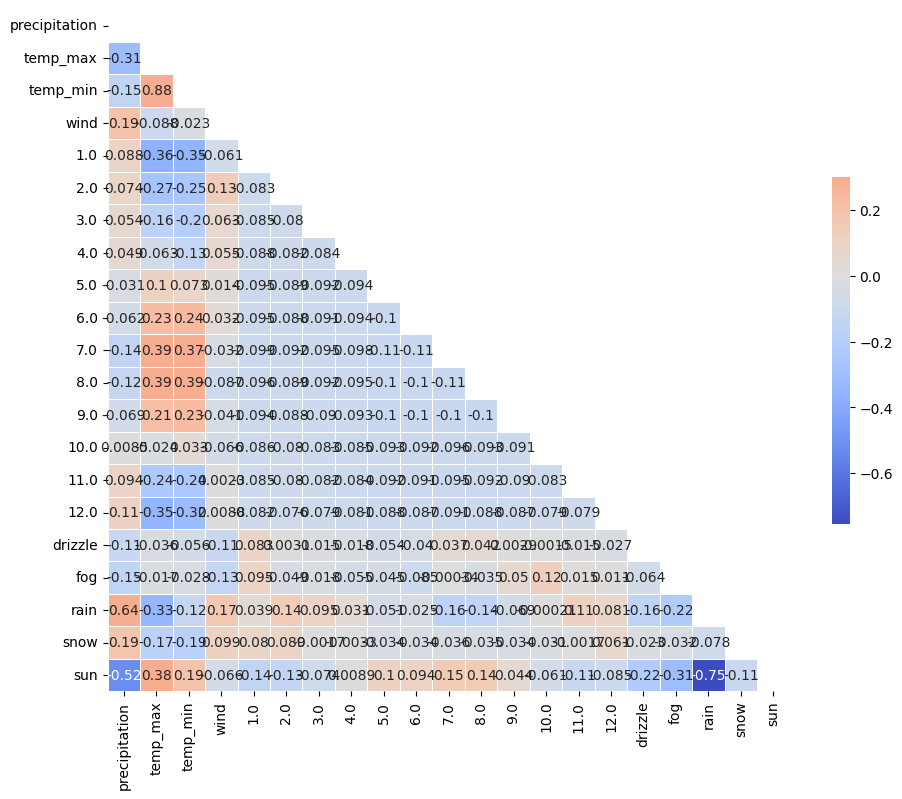

In [638]:
corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [639]:
strong_corrs = corr[(corr > 0.5) | (corr < -0.5)]
np.fill_diagonal(strong_corrs.values, np.nan)
strong_corr_pairs = strong_corrs.unstack().dropna()
strong_corr_pairs = strong_corr_pairs[strong_corr_pairs != 1.0]
strong_corr_pairs = strong_corr_pairs.sort_values(ascending=False)
print(strong_corr_pairs)

temp_max       temp_min         0.883382
temp_min       temp_max         0.883382
precipitation  rain             0.639088
rain           precipitation    0.639088
precipitation  sun             -0.521501
sun            precipitation   -0.521501
rain           sun             -0.753080
sun            rain            -0.753080
dtype: float64


In [640]:
dataset_with_outliers.head()

,precipitation,temp_max,temp_min,wind,weather,month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,z_score
0,0.0,12.8,5.0,4.7,drizzle,1.0,1,0,0,0,0,0,0,0,0,0,0,0,-0.497209
1,10.9,10.6,2.8,4.5,rain,1.0,1,0,0,0,0,0,0,0,0,0,0,0,-0.796885
2,0.8,11.7,7.2,2.3,rain,1.0,1,0,0,0,0,0,0,0,0,0,0,0,-0.647047
3,20.3,12.2,5.6,4.7,rain,1.0,1,0,0,0,0,0,0,0,0,0,0,0,-0.578939
4,1.3,8.9,2.8,6.1,rain,1.0,1,0,0,0,0,0,0,0,0,0,0,0,-1.028454


In [641]:
dataset_with_outliers.drop(columns=['z_score'], inplace=True)

In [642]:
dataset_with_outliers.shape

(1456, 18)

In [643]:
dataset_with_outliers['weather'].value_counts()

rain       640
sun        636
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

### **Part 2: Training and testing**

As we mentioned before, our goal is to predict the weather type. Predictions can be divided into two types: one is for discrete outcomes, which is classification, and the other is for continuous outcomes, which is regression. Since the weather type is a categorical issue, we need to employ a classification model.

**Step 1**: The first step is to divide the current dataset into a training set and a testing set. In some practical experiments, we also have a validation set, which is used to test unknown data. However, for now, we will use only the training set and testing set to train and test the model.

In [644]:
from sklearn.model_selection import train_test_split

y = dataset_with_outliers['weather']
X = dataset_with_outliers.drop(columns=['weather'])


X_train, X_test, y_train,  y_test = train_test_split(X,y ,
                          random_state=104,
                          train_size=0.8, shuffle=True)

print("X_train shape: " , X_train.shape, "X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape, "y_test shape: ", y_test.shape)

X_train shape:  (1164, 17) X_test shape:  (292, 17)
y_train shape:  (1164,) y_test shape:  (292,)


**Step 2**: Select a model to train the data. There are many types of models, and here are a few commonly used ones: Random Forest, SVM (Support Vector Machine), and KNN (K-Nearest Neighbors). Here, we will use Random Forest as an example.

In [645]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

**Step 3**: Use the trained model to predict the data in the test set and compare it with the actual results in the test set. There are many ways to compare, with Accuracy being the one of most common. Accuracy is the percentage of predictions that match the actual samples. Other methods include the F1 Score, Confusion Matrix, etc. For this assignment, we will use accuracy as the metric to measure the model's accuracy.

In [646]:
y_pred = rf.predict(X_test)

In [647]:
 from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

 accuracy = accuracy_score(y_test, y_pred)
 print("Accuracy:", accuracy)

 f1 = f1_score(y_test, y_pred, average=None)
 print("F1 score:", f1)

Accuracy: 0.821917808219178
F1 score: [0.19047619 0.14285714 0.95419847 0.66666667 0.81818182]


In [648]:
class_labels = rf.classes_
for label, score in zip(class_labels, f1):
    print("Class: {}, F1 Score: {}".format(label,score))

Class: drizzle, F1 Score: 0.19047619047619044
Class: fog, F1 Score: 0.14285714285714285
Class: rain, F1 Score: 0.9541984732824427
Class: snow, F1 Score: 0.6666666666666666
Class: sun, F1 Score: 0.8181818181818181


In [658]:
f1_scores_dict = dict(zip(class_labels, f1))

model_metrics_dict = {
    'RandomForestClassifier': {
        'accuracy': accuracy,
        'f1_scores': f1_scores_dict
    }
}



#### <font color='#008DFF'>  **Question 3**

Please choose a model other than the Random Forest classifier for training and predicting the data, and report the model's final accuracy. <br><br>

<b>Expected Output: </b> The value of accuracy is not required to be the same <br><code>print("My accuracy:", my_accuracy) <br>My accuracy: 0.8082191780821918<br>
</code>

In [663]:
# Your code here. Add more cells if needed
knn = KNeighborsClassifier(n_neighbors=7,n_jobs=-1)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

accuracy_mine = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_mine)

f1 = f1_score(y_test, y_pred, average=None)

for label, score in zip(class_labels, f1):
  print("Class: {}, F1 Score: {}".format(label,score))

Accuracy: 0.7226027397260274
Class: drizzle, F1 Score: 0.2
Class: fog, F1 Score: 0.12903225806451615
Class: rain, F1 Score: 0.8142292490118578
Class: snow, F1 Score: 0.0
Class: sun, F1 Score: 0.7591240875912411


In [651]:
# Grader's area


# M[2,1] =

max_score_M[2,1] = 5

### **Part 3: Hyperparameter Tunning**
Next, we need to tune the model to make it more suitable for predicting the weather. Below are some parameters that can be adjusted, and more parameters can be found on the official website.

**Offical link:** https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


*   n_estimators : The number of trees in the forest
*   max_depth : The maximum depth of the tree
*   max_features : The number of features to consider when looking for the best split
*   min_sample_leaf : The minimum number of samples required to be at a leaf node
*   min_sample_split : The minimum number of samples required to be at a leaf node








We use the exhaustive method to run all possible parameters and select the ones that perform the best. Since the number of models needed to be run is very high due to the multiplication of the number of parameters. It is very time-consuming. Here, as an example, we only adjusted one parameter and tried three different values.

In [660]:
from sklearn.model_selection import GridSearchCV


# example_param_grid = {
#     'n_estimators':[10,50,100],
#     'max_depth':[3,5,10],
#     'max_features':[1,3,5,7],
#     'min_samples_leaf':[1,2,3],
#     'min_samples_split':[1,2,3]
# }

param_grid = {
    'n_estimators':[10,50,100],
}


grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid, scoring='accuracy')

grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(n_estimators=50)


In [661]:
y_pred_optimal = grid_search.predict(X_test)

accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print("Accuracy:", accuracy_optimal)
print("Whether our model improves: ", (accuracy_optimal - accuracy) > 0)

Accuracy: 0.8082191780821918
Whether our model improves:  False


#### <font color='#008DFF'>  **Question 4**

Please tune the model you trained and tested in question 3, and improve its accuracy. <br><br>

<b>Expected Output:</b> The value of accuracy is not required to be the same <br><code>print("My accuracy:", my_accuracy_optimal)<br>My accuracy: 0.8116438356164384 <br>print("Whether our model improves: ", (my_accuracy_optimal - my_accuracy) > 0)
<br>
Whether our model improves:  True
</code>

In [662]:
# Your code here. Add more cells if needed

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(knn, param_grid, cv=7, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

y_pred_optimal = grid_search.predict(X_test)

accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print("Accuracy:", accuracy_optimal)
print("Whether our model improves: ", (accuracy_optimal - accuracy_mine) > 0)


f1 = f1_score(y_test, y_pred_optimal, average=None)

for label, score in zip(class_labels, f1):
  print("Class: {}, F1 Score: {}".format(label,score))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best score: 0.7680387933255691
Accuracy: 0.7534246575342466
Whether our model improves:  True
Class: drizzle, F1 Score: 0.2
Class: fog, F1 Score: 0.25
Class: rain, F1 Score: 0.8629032258064516
Class: snow, F1 Score: 0.2857142857142857
Class: sun, F1 Score: 0.7653429602888087


In [655]:
# Grader's area


# M[3,1] =

max_score_M[3,1] = 5

In [656]:
#Grader's area


rawScore = np.sum(M)
maxScore = np.sum(max_score_M)
score = rawScore*100/maxScore

In [657]:
print("raw sccore: ", rawScore, ", max raw score: ", maxScore, ". final score: ", score)

raw sccore:  0.0 , max raw score:  15.0 . final score:  0.0


#### Working on my models